In [8]:
from Advertising.learners.greedyLearner import *
import matplotlib.pyplot as plt
import numpy as np
from SocialNetwork.social_network_environment import *
from SocialNetwork.cascade import *
from Advertising.enviroment.bid import *
from Advertising.enviroment.VCG import *
from Advertising.learners.GTS_Learner import *
from Advertising.learners.GTS_SW_Learner import *
from Advertising.learners.TS_no_qualities import *
from tqdm.autonotebook import tqdm
from Advertising.learners.TS_sliding_window import *
import itertools
#seed = 6789
seed=1234
random.seed(seed)
only_first = False


lambdas = [0.5, 0.42, 0.38, 0.30, 0.2, 0.05]
social_network = social_network_environment()
social_network.init_from_json(
    json_path_network='Config/network.json', json_path_features='Config/features.json')

adversary_bids = []
for _ in range(0, 10):
    adversary_i_bids = []
    for __ in range(0, 5):
        adversary_i_bids.append(random.randint(0, 4))
    adversary_bids.append(adversary_i_bids)


with open("Config/estimated_influence.json", "r"):
    data = json.load(open("Config/estimated_influence.json"))

active_by_influence_reward = np.array(data.get("estimated_influence"))


In [9]:
expected_values = []
expected_values2 = []
sw_size = 10000
arms = arms_creation(seed=30291, number_of_arms=20)
ts_learner = GTS_SW_Learner(20, arms, variance=40, size_SW=sw_size, ad_id=1)
ts_learner2 = GTS_SW_Learner(20, arms, variance=40, size_SW=sw_size, ad_id=1)
n_experiments=45000

for j in range(0, 1):
    best_Arm = []
    print("This is TS number " + str(j))

    best_arm, best_arm_index, number_of_pulls, expected_values, thing_to_plot, clairvoyants, clair_ex = test_sw(
        ts_learner, arms, adversary_bids, only_first, n_experiments, lambdas, social_network, sw_size)
    best_arm2, best_arm_index2, number_of_pulls2, expected_values2, thing_to_plot2, clairvoyants2, clair_ex2 = test_sw(
        ts_learner2, arms, adversary_bids, not only_first, n_experiments, lambdas, social_network, sw_size)

    print("Valori non solo prima posizione:")
    print(best_arm)
    print(number_of_pulls)
    print(expected_values)

    print("Valori solo prima posizione:")
    print(best_arm2)
    print(number_of_pulls2)
    print(expected_values2)


This is TS number 0
[-0.2478947368421045, -2.7252993595098842, 1.4979999999999953, 0.009572935661410863, 0.5749291338582677, -2.496105263157896, -0.05499999999999986, -0.009447722445128275, -2.3607518796992495, -1.135712074303406, -6.800789473684214, -1.2009670517757838, -0.3250000000000002, -1.8109847198641773, 2.060527767684688, -4.7956140350877225, -4.932500000000003, 0.746666666666666, 1.5917293233082703, 0.31807017543859406]
14
[1.0766666666666682, -1.1874999999999998, 1.9388888888888869, -0.5600000000000016, 1.707499999999999, 2.557499999999998, 1.9628571428571442, -4.3466666666666685, -3.2233333333333323, 2.819999999999998, -0.7583333333333337, -2.9850000000000017, 0.03037451622507599, 1.3133333333333337, 0.0, 0.4716666666666652, 1.3819999999999975, 0.15417290552584348, 0.0, 2.6314035087719314]
9
Valori non solo prima posizione:
[2 3 2 1 1]
[4, 9, 5, 301, 635, 5, 6, 223, 7, 136, 4, 123, 6, 93, 43414, 3, 4, 6, 7, 9]
[-0.2478947368421045, -2.7252993595098842, 1.4979999999999953, 0

THE BEST ARM FOR EXPERIMENT TOTAL IS: [2 3 2 1 1] INDEX 14
THE BEST ARM FOR EXPERIMENT ONLY FIRST IS: [0 4 3 3 1] INDEX 9


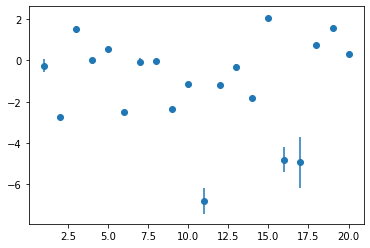

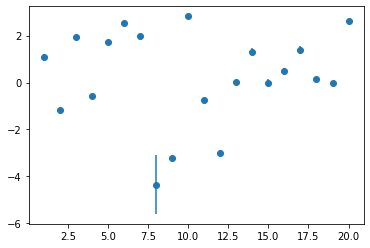

[[2 3 2 1 1]
 [2 3 2 1 1]
 [2 3 2 1 1]
 [2 3 2 1 1]
 [2 3 2 1 1]]
[3.3169740882400567, 2.474245700343661, 2.420064676339697, 2.048018349358777, 2.060527767684688]
[[3 4 3 3 0]
 [0 4 3 3 1]
 [0 4 3 3 1]
 [0 4 3 3 1]
 [0 4 3 3 1]]
[4.290833333333333, 2.819999999999998, 2.819999999999998, 2.819999999999998, 2.819999999999998]


In [10]:
print("THE BEST ARM FOR EXPERIMENT TOTAL IS:",
      arms[best_arm_index], "INDEX", best_arm_index)
print("THE BEST ARM FOR EXPERIMENT ONLY FIRST IS:",
      arms[best_arm_index2], "INDEX", best_arm_index2)

array = [i+1 for i in range(0, 20)]


plt.figure(1)
plt.errorbar(array, expected_values, yerr=(1/ts_learner.tau0), fmt='o')
plt.figure(0)
plt.errorbar(array, expected_values2, yerr=(1/ts_learner2.tau0), fmt='o')

plt.show()
print(np.array(arms)[clairvoyants])
print(clair_ex)
print(np.array(arms)[clairvoyants2])
print(clair_ex2)


Here are reward and regret for the case without ad qualities, with only ads in first position


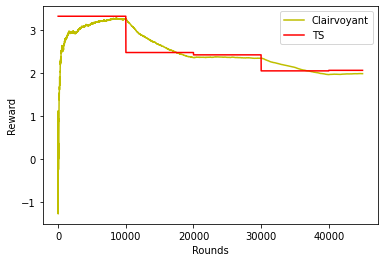

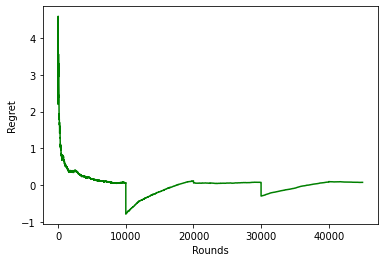

In [11]:
print("Here are reward and regret for the case without ad qualities, with only ads in first position")
best_values = []
j = 0
k = 0
for i in range(n_experiments):
    k += 1
    best_values.append(clair_ex[j])
    if k == sw_size:
        k = 0
        j += 1

regret_no_qualities = [
    best_values[x] - thing_to_plot[x] for x in range(len(thing_to_plot))]
plt.figure(0)
plt.plot(thing_to_plot, 'y')
plt.ylabel("Reward")
plt.xlabel("Rounds")
plt.plot(best_values, 'r')
plt.legend(["Clairvoyant", "TS"])

plt.figure(1)
plt.ylabel("Regret")
plt.xlabel("Rounds")
plt.plot(regret_no_qualities, 'g')


Here are reward and regret for the case without ad qualities, with only ads in first position


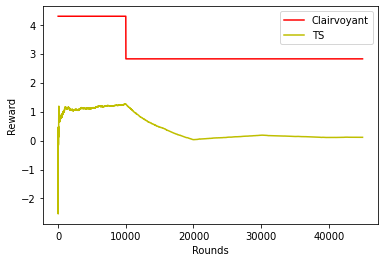

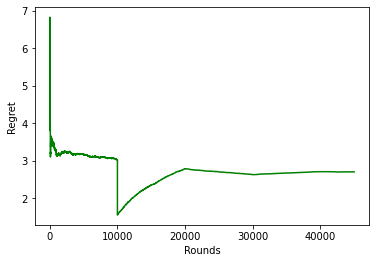

In [12]:
print("Here are reward and regret for the case without ad qualities, with only ads in first position")
best_values2 = []
j = 0
k = 0
for i in range(n_experiments):
    k += 1
    best_values2.append(clair_ex2[j])
    if k == sw_size:
        k = 0
        j += 1

regret_no_qualities2 = [
    best_values2[x] - thing_to_plot2[x] for x in range(len(thing_to_plot2))]
plt.figure(0)
plt.plot(best_values2, 'r')
plt.plot(thing_to_plot2, 'y')
plt.ylabel("Reward")
plt.xlabel("Rounds")
plt.legend(["Clairvoyant", "TS"])

plt.figure(1)
plt.ylabel("Regret")
plt.xlabel("Rounds")
plt.plot(regret_no_qualities2, 'g')


in this case we can see that the the clairvoyant remains the same for multiple windows, but the learner does not reach it, this means that the leaner during time forget the past story, but it's correct.  